In [664]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(69)
risk_free_rate=.0655
data = yf.download("BANDHANBNK.NS GILLETTE.NS NCC.NS FORTIS.NS RECLTD.NS DIVISLAB.NS COROMANDEL.NS", period="1y")
data

[*********************100%***********************]  7 of 7 completed


Price                         Adj Close                             \
Ticker                    BANDHANBNK.NS COROMANDEL.NS  DIVISLAB.NS   
Date                                                                 
2023-10-16 00:00:00+00:00    242.241852   1150.341187  3632.902588   
2023-10-17 00:00:00+00:00    237.875336   1157.414917  3624.355225   
2023-10-18 00:00:00+00:00    236.287521   1155.820801  3618.988037   
2023-10-19 00:00:00+00:00    227.405640   1155.771118  3615.559082   
2023-10-20 00:00:00+00:00    223.783432   1133.553345  3532.618164   
...                                 ...           ...          ...   
2024-10-09 00:00:00+00:00    188.850006   1610.550049  5989.750000   
2024-10-10 00:00:00+00:00    187.699997   1628.050049  5942.149902   
2024-10-11 00:00:00+00:00    210.259995   1638.949951  6142.250000   
2024-10-14 00:00:00+00:00    200.059998   1626.099976  6214.850098   
2024-10-15 00:00:00+00:00    194.350006   1631.400024  6106.700195   

Price                                                                       \
Ticker                      FORTIS.NS  GILLETTE.NS      NCC.NS   RECLTD.NS   
Date                                                                         
2023-10-16 00:00:00+00:00  336.507904  6198.021973  161.730072  283.498657   
2023-10-17 00:00:00+00:00  336.757385  6176.434570  161.879028  283.546906   
2023-10-18 00:00:00+00:00  335.060852  6155.833496  157.012726  278.629883   
2023-10-19 00:00:00+00:00  333.114838  6220.890137  157.658249  284.414581   
2023-10-20 00:00:00+00:00  331.518158  6217.637695  153.338165  277.521149   
...                               ...          ...         ...         ...   
2024-10-09 00:00:00+00:00  607.450012  8995.849609  298.899994  532.400024   
2024-10-10 00:00:00+00:00  614.400024  8952.000000  301.799988  544.250000   
2024-10-11 00:00:00+00:00  600.299988  9023.549805  298.450012  537.900024   
2024-10-14 00:00:00+00:00  597.700012  9055.299805  296.149994  540.349976   
2024-10-15 00:00:00+00:00  619.700012  9098.599609  300.450012  547.299988   

Price                             Close                             ...  \
Ticker                    BANDHANBNK.NS COROMANDEL.NS  DIVISLAB.NS  ...   
Date                                                                ...   
2023-10-16 00:00:00+00:00    244.100006   1154.599976  3655.199951  ...   
2023-10-17 00:00:00+00:00    239.699997   1161.699951  3646.600098  ...   
2023-10-18 00:00:00+00:00    238.100006   1160.099976  3641.199951  ...   
2023-10-19 00:00:00+00:00    229.149994   1160.050049  3637.750000  ...   
2023-10-20 00:00:00+00:00    225.500000   1137.750000  3554.300049  ...   
...                                 ...           ...          ...  ...   
2024-10-09 00:00:00+00:00    188.850006   1610.550049  5989.750000  ...   
2024-10-10 00:00:00+00:00    187.699997   1628.050049  5942.149902  ...   
2024-10-11 00:00:00+00:00    210.259995   1638.949951  6142.250000  ...   
2024-10-14 00:00:00+00:00    200.059998   1626.099976  6214.850098  ...   
2024-10-15 00:00:00+00:00    194.350006   1631.400024  6106.700195  ...   

Price                             Open                                Volume  \
Ticker                     GILLETTE.NS      NCC.NS   RECLTD.NS BANDHANBNK.NS   
Date                                                                           
2023-10-16 00:00:00+00:00  6323.000000  162.149994  294.850006       6182055   
2023-10-17 00:00:00+00:00  6288.000000  164.699997  296.500000       6938782   
2023-10-18 00:00:00+00:00  6266.049805  163.600006  294.000000      12057238   
2023-10-19 00:00:00+00:00  6270.299805  158.500000  287.700012      17897543   
2023-10-20 00:00:00+00:00  6329.799805  159.399994  294.799988       7440024   
...                                ...         ...         ...           ...   
2024-10-09 00:00:00+00:00  8879.000000  302.000000  529.000000       8315684   
2024-10-10 00:00:00+00:00  9053.700195  300.149994  536.950012       537795

In [665]:
df=data[[('Adj Close', 'BANDHANBNK.NS'),
         ('Adj Close', 'COROMANDEL.NS'),
            ('Adj Close',   'DIVISLAB.NS'),
            ('Adj Close',     'FORTIS.NS'),
            ('Adj Close',   'GILLETTE.NS'),
            ('Adj Close',        'NCC.NS'),
            ('Adj Close',     'RECLTD.NS'),]]
df

Price                         Adj Close                             \
Ticker                    BANDHANBNK.NS COROMANDEL.NS  DIVISLAB.NS   
Date                                                                 
2023-10-16 00:00:00+00:00    242.241852   1150.341187  3632.902588   
2023-10-17 00:00:00+00:00    237.875336   1157.414917  3624.355225   
2023-10-18 00:00:00+00:00    236.287521   1155.820801  3618.988037   
2023-10-19 00:00:00+00:00    227.405640   1155.771118  3615.559082   
2023-10-20 00:00:00+00:00    223.783432   1133.553345  3532.618164   
...                                 ...           ...          ...   
2024-10-09 00:00:00+00:00    188.850006   1610.550049  5989.750000   
2024-10-10 00:00:00+00:00    187.699997   1628.050049  5942.149902   
2024-10-11 00:00:00+00:00    210.259995   1638.949951  6142.250000   
2024-10-14 00:00:00+00:00    200.059998   1626.099976  6214.850098   
2024-10-15 00:00:00+00:00    194.350006   1631.400024  6106.700195   

Price                                                                       
Ticker                      FORTIS.NS  GILLETTE.NS      NCC.NS   RECLTD.NS  
Date                                                                        
2023-10-16 00:00:00+00:00  336.507904  6198.021973  161.730072  283.498657  
2023-10-17 00:00:00+00:00  336.757385  6176.434570  161.879028  283.546906  
2023-10-18 00:00:00+00:00  335.060852  6155.833496  157.012726  278.629883  
2023-10-19 00:00:00+00:00  333.114838  6220.890137  157.658249  284.414581  
2023-10-20 00:00:00+00:00  331.518158  6217.637695  153.338165  277.521149  
...                               ...          ...         ...         ...  
2024-10-09 00:00:00+00:00  607.450012  8995.849609  298.899994  532.400024  
2024-10-10 00:00:00+00:00  614.400024  8952.000000  301.799988  544.250000  
2024-10-11 00:00:00+00:00  600.299988  9023.549805  298.450012  537.900024  
2024-10-14 00:00:00+00:00  597.700012  9055.299805  296.149994  540.349976  
2024-10-15 00:00:00+00:00  619.700012  9098.599609  300.450012  547.299988  

[245 rows x 7 columns]

In [666]:
returns = df.pct_change().dropna()
returns.columns = returns.columns.get_level_values(1)
mean_returns = returns.mean()
annualised_mean_returns=mean_returns*252
annualised_mean_returns


Ticker
BANDHANBNK.NS   -0.153336
COROMANDEL.NS    0.399107
DIVISLAB.NS      0.568077
FORTIS.NS        0.674149
GILLETTE.NS      0.430811
NCC.NS           0.766981
RECLTD.NS        0.819598
dtype: float64

In [667]:
cov_matrix = returns.cov()
cov_matrix

Ticker,BANDHANBNK.NS,COROMANDEL.NS,DIVISLAB.NS,FORTIS.NS,GILLETTE.NS,NCC.NS,RECLTD.NS
Ticker,,,,,,,
BANDHANBNK.NS,0.000597,0.000141,0.000121,0.000047,0.000044,0.000289,0.000294
COROMANDEL.NS,0.000141,0.000302,0.000094,0.000057,0.000009,0.000167,0.000209
DIVISLAB.NS,0.000121,0.000094,0.000251,0.000052,0.000039,0.000098,0.000094
FORTIS.NS,0.000047,0.000057,0.000052,0.000342,0.000009,0.000120,0.000116
GILLETTE.NS,0.000044,0.000009,0.000039,0.000009,0.000274,0.000070,0.000108
NCC.NS,0.000289,0.000167,0.000098,0.000120,0.000070,0.001015,0.000503
RECLTD.NS,0.000294,0.000209,0.000094,0.000116,0.000108,0.000503,0.001066


In [668]:
variance=returns.var()
variance
annualised_variance=variance*252
standard_deviation=np.sqrt(annualised_variance)
standard_deviation

Ticker
BANDHANBNK.NS    0.387877
COROMANDEL.NS    0.275819
DIVISLAB.NS      0.251421
FORTIS.NS        0.293472
GILLETTE.NS      0.262989
NCC.NS           0.505774
RECLTD.NS        0.518398
dtype: float64

## Equally Weighted Portfolio

In [669]:
x=1/7
weights=np.array([x for i in range(0,7)])
weights
portfolio_return=np.dot(mean_returns,weights)*252
portfolio_return
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))*252
portfolio_variance
portfolio_risk=np.sqrt(portfolio_variance)

portfolio_variance

0.04734808727779627

In [670]:
portfolio_risk

0.2175961563948138

In [671]:
portfolio_return

0.5007694803041616

In [672]:
Sharpe_ratio=portfolio_return-risk_free_rate
Sharpe_ratio=Sharpe_ratio/portfolio_risk
Sharpe_ratio

2.000354636386104

## Minimum Variance Portfolio

In [673]:
def make_random_portfolio(n,returns, covariance_matrix):
    random_weights=np.random.rand(n)
    random_weights=random_weights/np.sum(random_weights)
    portfolio_return=np.dot(random_weights,returns)*252
    portfolio_variance=np.dot(random_weights.T,np.dot(covariance_matrix,random_weights))*252

    return random_weights,portfolio_return,portfolio_variance

In [674]:
min_variance=100
er=[]
sigma=[]
sharpe_ratio=0
min_weights=np.ones(7)
for i in range(0,200000):
    x,y,z=make_random_portfolio(7,mean_returns,cov_matrix)
    er.append(y)
    sigma.append(np.sqrt(z))
    if(z<min_variance):
        min_variance=z
        min_weights=x
        min_return=y
    sharpe_temp=(y-risk_free_rate)/np.sqrt(z)
    if(sharpe_temp>sharpe_ratio):
        sharpe_ratio=sharpe_temp
        sharpe_weights=x
        sharpe_return=y
        sharpe_variance=z


In [675]:
print(f"min_var_weights: {min_weights}")
print(f"min_var_return: {min_return}")
print(f"min_variance: {min_variance}")
print(f"max_sharpe_ratio: {sharpe_ratio}")
print(f"max_sharpe_weights: {sharpe_weights}")
print(f"max_sharpe_return: {sharpe_return}")
print(f"max_sharpe_variance: {sharpe_variance}")

min_var_weights: [0.02150626 0.19083214 0.25826875 0.19239956 0.31557493 0.0007287
 0.02068966]
min_var_return: 0.5027564436399908
min_variance: 0.026312757247045657
max_sharpe_ratio: 2.938170783876676
max_sharpe_weights: [0.00059127 0.00868862 0.34576195 0.28280216 0.20704365 0.05439267
 0.10071968]
max_sharpe_return: 0.6039116296533861
max_sharpe_variance: 0.03357954384014485


## Efficient Frontier and Tangency Portfolio

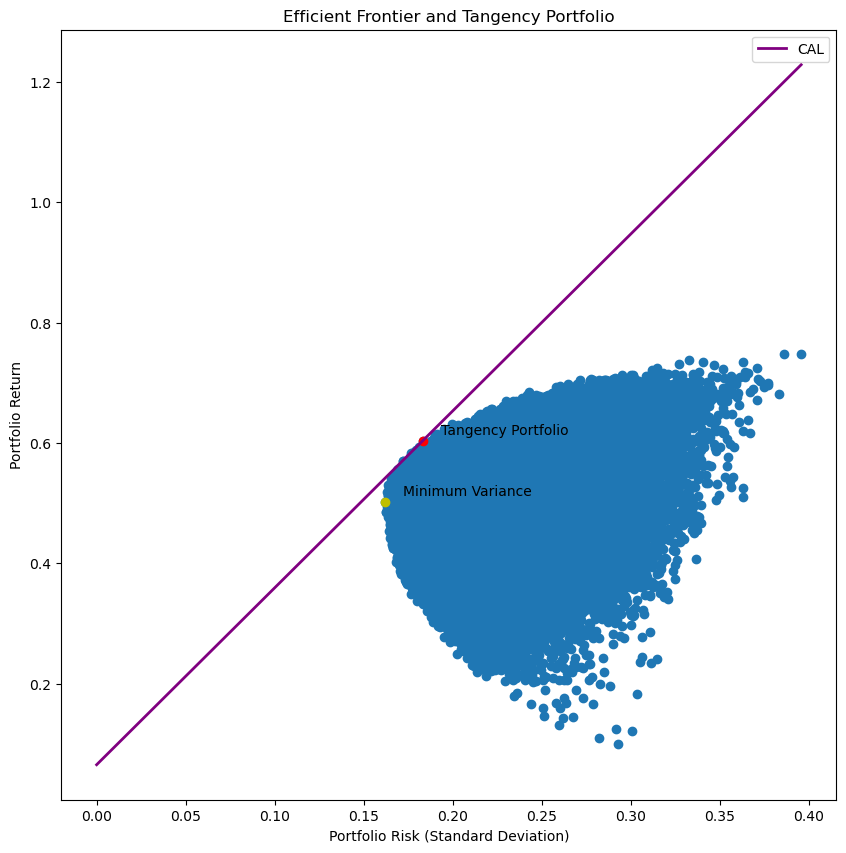

In [676]:
plt.figure(figsize=(10,10))
plt.scatter(sigma,er)
plt.scatter(np.sqrt(sharpe_variance),sharpe_return,c="r")
plt.scatter(np.sqrt(min_variance),min_return, c='y')


plt.annotate('Tangency Portfolio', 
             xy=(np.sqrt(sharpe_variance),sharpe_return), 
             xytext=(np.sqrt(sharpe_variance) + 0.01,sharpe_return + 0.01),
             fontsize=10)

plt.annotate('Minimum Variance', 
             xy=(np.sqrt(min_variance),min_return), 
             xytext=(np.sqrt(min_variance) + 0.01,min_return + 0.01),
             fontsize=10)

x = np.linspace(0, max(sigma), 100)
y = risk_free_rate + sharpe_ratio * x
plt.title("Efficient Frontier and Tangency Portfolio")
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.plot(x,y,c='purple',label='CAL',linewidth=2)
plt.legend()

# International Portfolio


In [677]:
data = yf.download("SPY BTC-USD BANDHANBNK.NS GILLETTE.NS NCC.NS FORTIS.NS RECLTD.NS DIVISLAB.NS COROMANDEL.NS", period="1y")
data

[*********************100%***********************]  9 of 9 completed


Price                         Adj Close                              \
Ticker                    BANDHANBNK.NS       BTC-USD COROMANDEL.NS   
Date                                                                  
2023-10-15 00:00:00+00:00           NaN  27159.652344           NaN   
2023-10-16 00:00:00+00:00    242.241852  28519.466797   1150.341187   
2023-10-17 00:00:00+00:00    237.875336  28415.748047   1157.414917   
2023-10-18 00:00:00+00:00    236.287521  28328.341797   1155.820801   
2023-10-19 00:00:00+00:00    227.405640  28719.806641   1155.771118   
...                                 ...           ...           ...   
2024-10-11 00:00:00+00:00    210.259995  62445.089844   1638.949951   
2024-10-12 00:00:00+00:00           NaN  63193.023438           NaN   
2024-10-13 00:00:00+00:00           NaN  62851.375000           NaN   
2024-10-14 00:00:00+00:00    200.059998  66046.125000   1626.099976   
2024-10-15 00:00:00+00:00    194.350006  65578.078125   1631.400024   

Price                                                                        \
Ticker                     DIVISLAB.NS   FORTIS.NS  GILLETTE.NS      NCC.NS   
Date                                                                          
2023-10-15 00:00:00+00:00          NaN         NaN          NaN         NaN   
2023-10-16 00:00:00+00:00  3632.902588  336.507904  6198.021973  161.730072   
2023-10-17 00:00:00+00:00  3624.355225  336.757385  6176.434570  161.879028   
2023-10-18 00:00:00+00:00  3618.988037  335.060852  6155.833496  157.012726   
2023-10-19 00:00:00+00:00  3615.559082  333.114838  6220.890137  157.658249   
...                                ...         ...          ...         ...   
2024-10-11 00:00:00+00:00  6142.250000  600.299988  9023.549805  298.450012   
2024-10-12 00:00:00+00:00          NaN         NaN          NaN         NaN   
2024-10-13 00:00:00+00:00          NaN         NaN          NaN         NaN   
2024-10-14 00:00:00+00:00  6214.850098  597.700012  9055.299805  296.149994   
2024-10-15 00:00:00+00:00  6106.700195  619.700012  9098.599609  300.450012   

Price                                                     Close  ...  \
Ticker                      RECLTD.NS         SPY BANDHANBNK.NS  ...   
Date                                                             ...   
2023-10-15 00:00:00+00:00         NaN         NaN           NaN  ...   
2023-10-16 00:00:00+00:00  283.498657  430.222290    244.100006  ...   
2023-10-17 00:00:00+00:00  283.546906  430.202576    239.699997  ...   
2023-10-18 00:00:00+00:00  278.629852  424.470062    238.100006  ...   
2023-10-19 00:00:00+00:00  284.414581  420.740509    229.149994  ...   
...                               ...         ...           ...  ...   
2024-10-11 00:00:00+00:00  537.900024  579.580017    210.259995  ...   
2024-10-12 00:00:00+00:00         NaN         NaN           NaN  ...   
2024-10-13 00:00:00+00:00         NaN         NaN           NaN  ...   
2024-10-14 00:00:00+00:00  540.349976  584.320007    200.059998  ...   
2024-10-15 00:00:00+00:00  547.299988         NaN    194.350006  ...   

Price                            Open        Volume               \
Ticker                            SPY BANDHANBNK.NS      BTC-USD   
Date                                                               
2023-10-15 00:00:00+00:00         NaN           NaN   7098201980   
2023-10-16 00:00:00+00:00  433.820007     6182055.0  27833876539   
2023-10-17 00:00:00+00:00  432.809998     6938782.0  14872527508   
2023-10-18 00:00:00+00:00  434.190002    12057238.0  12724128586   
2023-10-19 00:00:00+00:00  430.950012    17897543.0  14448058195   
...                               ...           ...          ...   
2024-10-11 00:00:00+00:00  576.049988   129824389.0  30327141594   
2024-10-12 00:00:00+00:00         NaN           NaN  16744110886   
2024-10-13 00:00:00+00:00         NaN           NaN  18177529690   
2024-10-14 00:00:00+00:00  581.219971    36977274.0  43706958056   
2024-

In [678]:
df=data[[('Adj Close', 'BANDHANBNK.NS'),
            ('Adj Close',       'BTC-USD'),
            ('Adj Close', 'COROMANDEL.NS'),
            ('Adj Close',   'DIVISLAB.NS'),
            ('Adj Close',     'FORTIS.NS'),
            ('Adj Close',   'GILLETTE.NS'),
            ('Adj Close',        'NCC.NS'),
            ('Adj Close',     'RECLTD.NS'),
            ('Adj Close',           'SPY'),]]
df.dropna(inplace=True)
df

Price                         Adj Close                              \
Ticker                    BANDHANBNK.NS       BTC-USD COROMANDEL.NS   
Date                                                                  
2023-10-16 00:00:00+00:00    242.241852  28519.466797   1150.341187   
2023-10-17 00:00:00+00:00    237.875336  28415.748047   1157.414917   
2023-10-18 00:00:00+00:00    236.287521  28328.341797   1155.820801   
2023-10-19 00:00:00+00:00    227.405640  28719.806641   1155.771118   
2023-10-20 00:00:00+00:00    223.783432  29682.949219   1133.553345   
...                                 ...           ...           ...   
2024-10-08 00:00:00+00:00    187.660004  62131.968750   1574.150024   
2024-10-09 00:00:00+00:00    188.850006  60582.101562   1610.550049   
2024-10-10 00:00:00+00:00    187.699997  60274.500000   1628.050049   
2024-10-11 00:00:00+00:00    210.259995  62445.089844   1638.949951   
2024-10-14 00:00:00+00:00    200.059998  66046.125000   1626.099976   

Price                                                                        \
Ticker                     DIVISLAB.NS   FORTIS.NS  GILLETTE.NS      NCC.NS   
Date                                                                          
2023-10-16 00:00:00+00:00  3632.902588  336.507904  6198.021973  161.730072   
2023-10-17 00:00:00+00:00  3624.355225  336.757385  6176.434570  161.879028   
2023-10-18 00:00:00+00:00  3618.988037  335.060852  6155.833496  157.012726   
2023-10-19 00:00:00+00:00  3615.559082  333.114838  6220.890137  157.658249   
2023-10-20 00:00:00+00:00  3532.618164  331.518158  6217.637695  153.338165   
...                                ...         ...          ...         ...   
2024-10-08 00:00:00+00:00  5547.049805  597.200012  8817.799805  300.600006   
2024-10-09 00:00:00+00:00  5989.750000  607.450012  8995.849609  298.899994   
2024-10-10 00:00:00+00:00  5942.149902  614.400024  8952.000000  301.799988   
2024-10-11 00:00:00+00:00  6142.250000  600.299988  9023.549805  298.450012   
2024-10-14 00:00:00+00:00  6214.850098  597.700012  9055.299805  296.149994   

Price                                              
Ticker                      RECLTD.NS         SPY  
Date                                               
2023-10-16 00:00:00+00:00  283.498657  430.222290  
2023-10-17 00:00:00+00:00  283.546906  430.202576  
2023-10-18 00:00:00+00:00  278.629852  424.470062  
2023-10-19 00:00:00+00:00  284.414581  420.740509  
2023-10-20 00:00:00+00:00  277.521149  415.570435  
...                               ...         ...  
2024-10-08 00:00:00+00:00  524.250000  573.169983  
2024-10-09 00:00:00+00:00  532.400024  577.140015  
2024-10-10 00:00:00+00:00  544.250000  576.130005  
2024-10-11 00:00:00+00:00  537.900024  579.580017  
2024-10-14 00:00:00+00:00  540.349976  584.320007  

[236 rows x 9 columns]

In [679]:
returns = df.pct_change().dropna()
returns.columns = returns.columns.get_level_values(1)
mean_returns = returns.mean()
annualised_mean_returns=mean_returns*252
annualised_mean_returns

Ticker
BANDHANBNK.NS   -0.128215
BTC-USD          1.058770
COROMANDEL.NS    0.411729
DIVISLAB.NS      0.609210
FORTIS.NS        0.659559
GILLETTE.NS      0.441958
NCC.NS           0.779030
RECLTD.NS        0.837210
SPY              0.336653
dtype: float64

In [680]:
cov_matrix = returns.cov()
cov_matrix

Ticker,BANDHANBNK.NS,BTC-USD,COROMANDEL.NS,DIVISLAB.NS,FORTIS.NS,GILLETTE.NS,NCC.NS,RECLTD.NS,SPY
Ticker,,,,,,,,,
BANDHANBNK.NS,0.000620,-0.000054,0.000153,0.000122,0.000054,0.000038,0.000296,0.000299,0.000017
BTC-USD,-0.000054,0.001265,-0.000058,-0.000020,-0.000039,0.000023,-0.000100,-0.000067,0.000077
COROMANDEL.NS,0.000153,-0.000058,0.000321,0.000096,0.000054,0.000003,0.000175,0.000214,0.000016
DIVISLAB.NS,0.000122,-0.000020,0.000096,0.000265,0.000065,0.000039,0.000098,0.000108,0.000010
FORTIS.NS,0.000054,-0.000039,0.000054,0.000065,0.000342,0.000017,0.000127,0.000120,0.000019
GILLETTE.NS,0.000038,0.000023,0.000003,0.000039,0.000017,0.000283,0.000065,0.000108,0.000010
NCC.NS,0.000296,-0.000100,0.000175,0.000098,0.000127,0.000065,0.001039,0.000520,0.000038
RECLTD.NS,0.000299,-0.000067,0.000214,0.000108,0.000120,0.000108,0.000520,0.001107,0.000032
SPY,0.000017,0.000077,0.000016,0.000010,0.000019,0.000010,0.000038,0.000032,0.000065


In [681]:
variance=returns.var()
variance
annualised_variance=variance*252
standard_deviation=np.sqrt(annualised_variance)
standard_deviation

Ticker
BANDHANBNK.NS    0.395189
BTC-USD          0.564587
COROMANDEL.NS    0.284296
DIVISLAB.NS      0.258396
FORTIS.NS        0.293604
GILLETTE.NS      0.266903
NCC.NS           0.511749
RECLTD.NS        0.528088
SPY              0.127849
dtype: float64

## Minimum Variance Portfolio

In [682]:
min_variance=100
er=[]
sigma=[]
sharpe_ratio=0
min_weights=np.ones(9)
for i in range(0,200000):
    x,y,z=make_random_portfolio(9,mean_returns,cov_matrix)
    er.append(y)
    sigma.append(np.sqrt(z))
    if(z<min_variance):
        min_variance=z
        min_weights=x
        min_return=y
    sharpe_temp=(y-risk_free_rate)/np.sqrt(z)
    if(sharpe_temp>sharpe_ratio):
        sharpe_ratio=sharpe_temp
        sharpe_weights=x
        sharpe_return=y
        sharpe_variance=z


In [683]:
print(f"min_var_weights: {min_weights}")
print(f"min_var_return: {min_return}")
print(f"min_variance: {min_variance}")
print(f"max_sharpe_ratio: {sharpe_ratio}")
print(f"max_sharpe_weights: {sharpe_weights}")
print(f"max_sharpe_return: {sharpe_return}")
print(f"max_sharpe_variance: {sharpe_variance}")

min_var_weights: [0.01471811 0.05373509 0.13150145 0.126278   0.14606158 0.16374616
 0.01204758 0.02083318 0.33107886]
min_var_return: 0.49306970348639645
min_variance: 0.015179114499048626
max_sharpe_ratio: 3.674134278622816
max_sharpe_weights: [0.00324838 0.11911197 0.04311979 0.24645567 0.18291216 0.11408409
 0.04499011 0.02808072 0.21799712]
max_sharpe_return: 0.5966018298057632
max_sharpe_variance: 0.020895152568471527


## Efficient Frontier and Tangency Portfolio

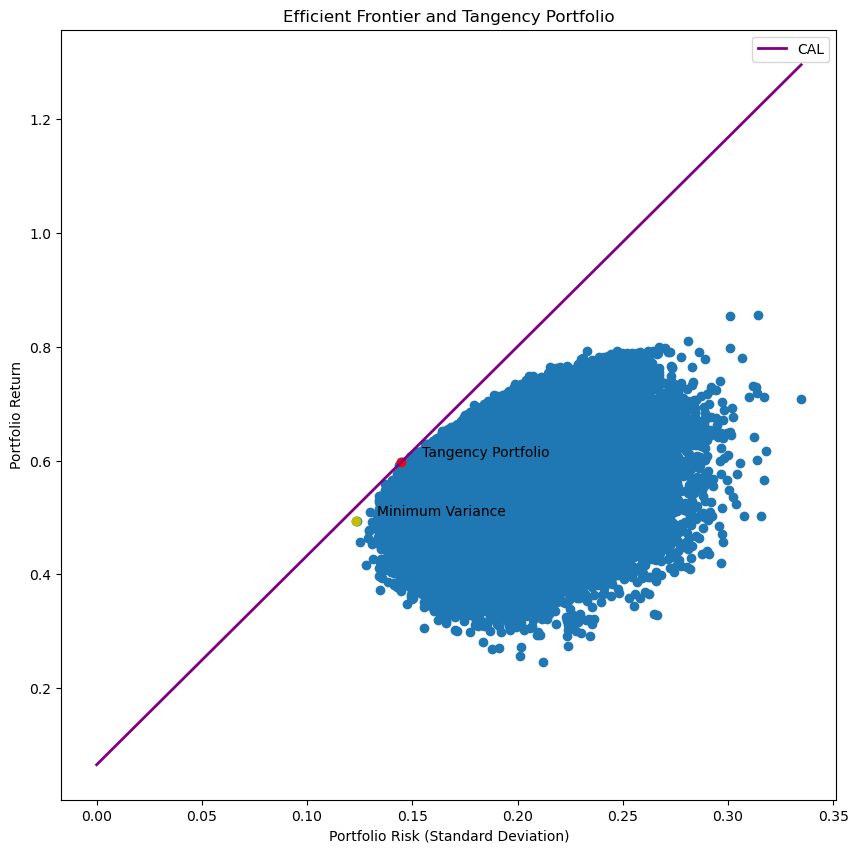

In [685]:
plt.figure(figsize=(10,10))
plt.scatter(sigma,er)
plt.scatter(np.sqrt(sharpe_variance),sharpe_return,c="r")
plt.scatter(np.sqrt(min_variance),min_return, c='y')


plt.annotate('Tangency Portfolio', 
             xy=(np.sqrt(sharpe_variance),sharpe_return), 
             xytext=(np.sqrt(sharpe_variance) + 0.01,sharpe_return + 0.01),
             fontsize=10)

plt.annotate('Minimum Variance', 
             xy=(np.sqrt(min_variance),min_return), 
             xytext=(np.sqrt(min_variance) + 0.01,min_return + 0.01),
             fontsize=10)


x = np.linspace(0, max(sigma), 100)
y = risk_free_rate + sharpe_ratio * x
plt.title("Efficient Frontier and Tangency Portfolio")
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.plot(x,y,c='purple',label='CAL',linewidth=2)
plt.legend()